In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output

In [27]:
def detect_circles(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise and improve circle detection
    blurred = cv2.bilateralFilter(gray, 9, 75, 75)
    
    # Detect circles using Hough Circle Transform
    circles = cv2.HoughCircles(
        blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=500,
        param1=50, param2=30, minRadius=15, maxRadius=100
    )
    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        
        for circle in circles[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            
            # Draw the circle outline
            cv2.circle(image, center, radius, (0, 255, 0), 4)
    
    return image


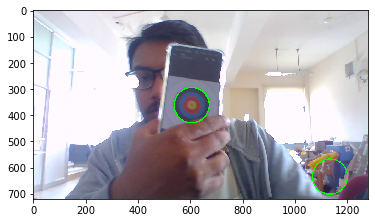

In [30]:
cap = cv2.VideoCapture(0)  # 0 indicates the default webcam

try:
    while True:
        ret, frame = cap.read()  # Read a frame from the webcam
        
        if not ret:
            break
        
        # Display the frame in the notebook
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        
           # Detect circles in the frame
        frame_with_circles = detect_circles(frame.copy())
        
        # Display the frame with circles in the notebook
        plt.imshow(cv2.cvtColor(frame_with_circles, cv2.COLOR_BGR2RGB))
        
        
        # Save the captured frame as an image file
        cv2.imwrite('captured_image.jpg', frame)
        
        # Clear the previous output before displaying the next frame
        clear_output(wait=True)
        
        break  # Capture a single image and then exit the loop
except KeyboardInterrupt:
    pass
finally:
    cap.release()  # Release the webcam
    cv2.destroyAllWindows()  # Close any OpenCV windows
